# **Exercise 05 - clustering**
### Laboratory of **Computational Physics**, module B
#### University of **Padua** *AY 2021/2022* 

### Group **02**
#### *Students:* Barone Francesco Pio, Nagaro Quiroz Gianmarco, Ninni Daniele, Valentini Lorenzo

***

In this notebook: data generation of an **infamous dataset**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['#ff2121', '#ffc421', '#00c94d', '#2185ff', '#b619ff']
plt.rcParams['font.size'] = 12

data_path = 'DATA'

add_noise = 3   # =0 to disable noisy dimensions

In [2]:
xsize = 10000  # size of dataset

M = 1000  # samples to generate for binning
L = 10    # number of bin margins + 1

In [3]:
# setting up the chosen probability functions
prb_functions = [ np.random.normal, np.random.normal, np.random.poisson, np.random.negative_binomial, np.random.gumbel]
prb_args = [ {'loc':7, 'scale': 2}, {'loc':7, 'scale': 3}, {'lam':6.5}, {'n':7, 'p':0.5}, {'loc':7, 'scale': 2}]

n_class = len(prb_functions)  # number of classes (probability distributions)

if len(prb_functions) != len(prb_args):
    print('ERROR: prb functions and args do not match')

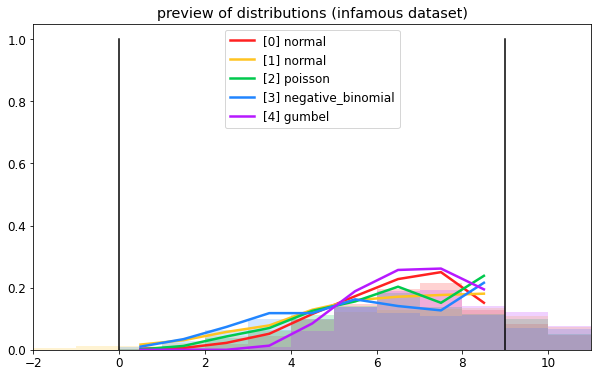

In [4]:
# plot the distributions
plt.figure(figsize=(10, 6))

for lidx in range(n_class):
    
    # generate samples from the probability distribution chosen by the label
    this_samples = prb_functions[lidx]( **(prb_args[lidx]), size=M )

    plt.hist(this_samples, bins=np.arange(-2,L+3), alpha = 0.2, density=True, color=colors[lidx])
    y, x = np.histogram(this_samples, bins=np.arange(L), density = True)
    plt.plot(x[:-1]+0.5, y, color=colors[lidx], linewidth=2.5,label=f'[{lidx}] {str(prb_functions[lidx].__name__)}')

plt.plot([0,0],[0,1], color='k')
plt.plot([L-1,L-1],[0,1], color='k')
plt.legend()
plt.xlim(-2,L+1)
plt.title('preview of distributions (infamous dataset)')
plt.savefig(f'{data_path}/infamous_data_preview.png')

In [5]:
############## DATA GENERATION ##############

# generate bin array, once for all
binL = np.arange(L)
print('bins:', binL)
bin_limit = binL[-1]

# generate the labels
y = np.random.randint(0, high=n_class, size=xsize)
print('labels:',y)

# behaviour: set a limit of replacements
replace_limit = 20
errors = 0

# generate the samples x
x = []
for idx, label in enumerate(y):
    
    # generate samples from the probability distribution chosen by the label
    this_samples = prb_functions[label]( **(prb_args[label]), size=M )
    
    creplace = 0 # count how many times we have replaced values
    
    # check if samples exceed the upper bin limit
    overflow_samples = np.sum((this_samples>bin_limit)|(this_samples<0))
    while overflow_samples != 0:
        # check how many time did you replace the data
        creplace +=1
        if creplace > replace_limit:
            print(f' WARNING: too many replacements for label {label}, check the code')
            errors += 1
            break
        
        # use fancy indexing to replace values
        this_samples[(this_samples>bin_limit)|(this_samples<0)] = prb_functions[label]( **(prb_args[label]), size=overflow_samples )
        
        # check again for overflow
        overflow_samples = np.sum((this_samples>bin_limit)|(this_samples<0))
        
    samples_binned, _ = np.histogram(this_samples, bins=binL)
    x.append(samples_binned/np.sum(samples_binned))
    #print(idx, label, samples_binned/np.sum(samples_binned))
    
x = np.matrix(x)

# print a sample of the dataset
for i in range(min(len(y),10)):
    print(f'[{y[i]}] ->', x[i])

print(f'\n\nThere have been {errors} errors.')
if errors > 0:
    raise 'ERROR'

bins: [0 1 2 3 4 5 6 7 8 9]
labels: [4 4 4 ... 3 1 0]
[4] -> [[0.    0.    0.001 0.016 0.064 0.211 0.267 0.234 0.207]]
[4] -> [[0.    0.    0.001 0.011 0.078 0.171 0.272 0.231 0.236]]
[4] -> [[0.    0.    0.001 0.017 0.078 0.176 0.264 0.258 0.206]]
[1] -> [[0.018 0.035 0.054 0.069 0.136 0.151 0.189 0.168 0.18 ]]
[1] -> [[0.017 0.034 0.048 0.096 0.124 0.157 0.175 0.186 0.163]]
[0] -> [[0.001 0.009 0.015 0.049 0.107 0.183 0.225 0.239 0.172]]
[1] -> [[0.02  0.034 0.054 0.079 0.145 0.168 0.171 0.182 0.147]]
[3] -> [[0.012 0.035 0.069 0.118 0.14  0.15  0.134 0.131 0.211]]
[2] -> [[0.003 0.011 0.033 0.079 0.123 0.161 0.182 0.164 0.244]]
[4] -> [[0.    0.    0.002 0.018 0.062 0.195 0.24  0.282 0.201]]


There have been 0 errors.


In [6]:
if add_noise > 0:
    noise = np.random.normal(loc=3.0, scale=2.0, size=(xsize,add_noise))
    x = np.concatenate((x, noise), axis=1)
print(len(x))

10000


In [7]:
np.savetxt(f'{data_path}/x_distr_infamous_noisy.txt', x)
np.savetxt(f'{data_path}/y_distr_infamous_noisy.txt', y, fmt='%i')

End of file.